# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [6]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [8]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
browser.visit("https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html")

In [18]:
html = browser.html
html[0:100]

'<html lang="en"><head>\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width,'

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [19]:
# Create a Beautiful Soup Object
tortilla_soup = BeautifulSoup(html)
type(tortilla_soup)

bs4.BeautifulSoup

In [20]:
# Extract all rows of data
weather_table = tortilla_soup.find("table", {"class": "table"})
weather_rows = weather_table.find_all("tr", {"class": "data-row"})

In [21]:
weather_rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

In [23]:
weather_columns = weather_table.find("tr").text.strip().split("\n")
weather_columns

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [29]:
test = weather_rows[0]
test

<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>

In [31]:
test.find("td").text.strip().split("/n")

['2']

In [34]:
test_to_zip = [x.text for x in test.find_all("td")]
test_to_zip

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']

In [35]:
dict(zip(weather_columns,test_to_zip))

{'id': '2',
 'terrestrial_date': '2012-08-16',
 'sol': '10',
 'ls': '155',
 'month': '6',
 'min_temp': '-75.0',
 'pressure': '739.0'}

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [36]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in weather_rows:
    values = [x.text for x in row.find_all("td")]
    zipped = dict(zip(weather_columns,values))
    
    data.append(zipped)
    

In [37]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data)

In [38]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [39]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [40]:
# Change data types for data analysis
df = df.apply(pd.to_numeric, errors= "ignore") # convert all columns of DataFrame and ignore str data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [41]:
# Convert date to datetime
df["terrestrial_date"] = pd.to_datetime(df.terrestrial_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [48]:
# 1. How many months are there on Mars?
df.month.unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5], dtype=int64)

In [49]:
df.month.nunique()

12

In [50]:
# 2. How many Martian days' worth of data are there?
df.id.count()

1867

In [58]:
# 3. What is the average low temperature by month?
monthly_min = df.groupby(df.month)["min_temp"].mean()
monthly_min

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [69]:
# Work to get values for monthly average min temp plot:

monthly_pd = pd.DataFrame(monthly_min)
monthly_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   min_temp  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


In [70]:
monthly_pd = monthly_pd.rename_axis('month').reset_index()
monthly_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12 non-null     int64  
 1   min_temp  12 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 320.0 bytes


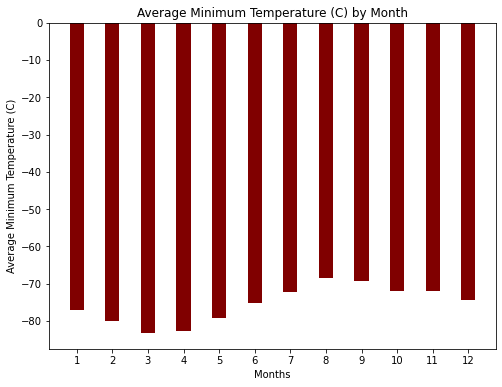

In [87]:
# Plot the average temperature by month

fig = plt.figure(figsize = (8, 6))

x = monthly_pd.month
y = monthly_pd.min_temp

plt.bar(x, y, color ='maroon', width = 0.4)

plt.xticks(x)
plt.xlabel("Months")
plt.ylabel("Average Minimum Temperature (C)")
plt.title("Average Minimum Temperature (C) by Month")

plt.show()

In [95]:
# Sort values and change types so that plot will show temperatures from coldest to warmest
df_sorted = monthly_pd.sort_values("min_temp").reset_index()
df_sorted2 = df_sorted.drop("index", axis=1)
df_sorted2["month"] = df_sorted2["month"].astype(str)
df_sorted2.head()

,month,min_temp
0,3,-83.307292
1,4,-82.747423
2,2,-79.932584
3,5,-79.308725
4,1,-77.160920


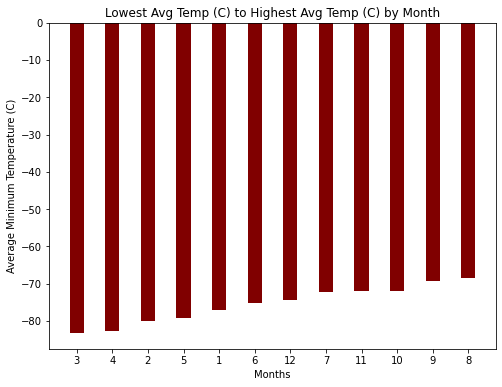

In [99]:
# Identify the coldest and hottest months in Curiosity's location

fig = plt.figure(figsize = (8, 6))

x = df_sorted2.month
y = df_sorted2.min_temp

plt.bar(x, y, data=df_sorted2, color ='maroon', width = 0.4)

# plt.xticks(df_sorted.month)
plt.xlabel("Months")
plt.ylabel("Average Minimum Temperature (C)")
plt.title("Lowest Avg Temp (C) to Highest Avg Temp (C) by Month")

plt.show()

In [101]:
# 4. Average pressure by Martian month
monthly_pres = df.groupby(df.month)["pressure"].mean()
monthly_pres

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [104]:
monthly_pres_df = pd.DataFrame(monthly_pres)
monthly_pres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pressure  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


In [105]:
monthly_pres_df = monthly_pres_df.rename_axis("month").reset_index()
monthly_pres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12 non-null     int64  
 1   pressure  12 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 320.0 bytes


In [107]:
# Sort values and change types so that plot will show pressure levels from lowest to highest
pres_sorted = monthly_pres_df.sort_values("pressure").reset_index()
pres_sorted2 = pres_sorted.drop("index", axis=1)
pres_sorted2["month"] = pres_sorted2["month"].astype(str)
pres_sorted2.head()

,month,pressure
0,6,745.054422
1,5,748.557047
2,7,795.105634
3,4,806.329897
4,12,842.156627


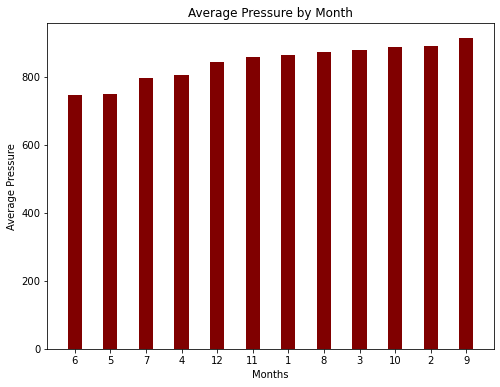

In [109]:
# Plot the average pressure by month

fig = plt.figure(figsize = (8, 6))

x = pres_sorted2.month
y = pres_sorted2.pressure

plt.bar(x, y, color ='maroon', width = 0.4)

plt.xticks(x)
plt.xlabel("Months")
plt.ylabel("Average Pressure")
plt.title("Average Pressure by Month")

plt.show()

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


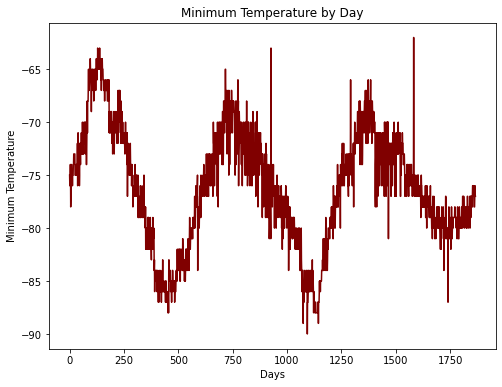

In [113]:
# 5. How many terrestrial (earth) days are there in a Martian year?

fig = plt.figure(figsize = (8, 6))

x = df.id.count()
y = df.min_temp

plt.plot(y, color ='maroon')

plt.xlabel("Days")
plt.ylabel("Minimum Temperature")
plt.title("Minimum Temperature by Day")

plt.show()

In [117]:
pres_sorted2.tail()

,month,pressure
7,8,873.829787
8,3,877.322917
9,10,887.312500
10,2,889.455056
11,9,913.305970


In [118]:
pres_sorted2.head()

,month,pressure
0,6,745.054422
1,5,748.557047
2,7,795.105634
3,4,806.329897
4,12,842.156627


Mars has very cold temperatures overall. The warmest average is in the eighth month, but it is still -68.38 degrees Celsius. The coldest month is the third month with an average temperature of -83.30 degrees Celsius. 

Atmospheric pressure on Mars is on average lowest in the sixth month with an average pressure of 745.05. The highest average pressure is during the eighth month with an average pressure of 873.82. It is interesting that both the highest pressure and the warmest low temperature averages occur during the eighth month.

The distance from peak to peak can be guestimated to be a full cycle of yearly weather and therefore can be used to try and find the amount of days in a year for Mars. Looking at the peaks, they are roughly from 1425-750, which is 675 days. To confirm, an internet search shows that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [119]:
# Write the data to a CSV
df.to_csv(r'C:\Users\brenn\SMU_Bootcamp\GitHub_Challenges\Ch12-Web-Scraping-and-Document-Databases\Starter_Code\df_csv.csv')

In [120]:
browser.quit()